# Задача 1

In [2]:
import numpy as np
import prettytable as pt
from matplotlib import pyplot as plt

In [3]:
def factorial(x):
    if x == 0:
        return 1
    else:
        return x * factorial(x - 1)

In [4]:
u = 1
u1 = 2

def f(x, y1):
    return -0.1 * y1 ** 2 - (1 + 0.1 * x) * y1

def u1_der1(x):
    return -0.1 * u1 ** 2 - (1 + 0.1 * x) * u

def u1_der2(x):
    return -0.2 * u1_der1(x) * u1 - (0.1 * u + (1 + 0.1 * x) * u1)

def u1_der3(x):
    return -0.2 * (u1_der1(x) ** 2 + u1 * u1_der2(x)) - (0.2 * u1 + (1 + 0.1 * x) * u1_der1(x))

def u1_der4(x):
    return  -0.2 * (3 * u1_der1(x) * u1_der2(x) + u1 * u1_der3(x)) - (0.3 * u1_der1(x) + (1 + 0.1 * x) * u1_der2(x))

In [5]:
x_start, x_end = 0, 5
N = 1000

h = (x_end - x_start) / N

x = np.arange(x_start, x_end, h)

In [6]:
# Разложение в ряд

a = u1_der1(0)
b = u1_der2(0)
c = u1_der3(0)

y_row = u + u1 * x + a * x ** 2 / 2 + b * x ** 3 / 6 + c * x ** 4 / 24

print(f"u(0): {u}\nu'(0): {u1}\nu''(0): {a / 2}\nu'''(0): {b / 6}\nu''''(0): {c / 24}")

u(0): 1
u'(0): 2
u''(0): -0.7
u'''(0): -0.25666666666666665
u''''(0): 0.051


In [7]:
# Эйлер
def y_eul(x, h):
    n = x.shape[0]

    y = np.zeros(n)
    y_1 = np.zeros(n)

    y[0] = 1
    y_1[0] = 2

    for i in range(1, n):
        y_1[i] = y_1[i - 1] + h * (-0.1 * y_1[i - 1] ** 2 - (1 + 0.1 * x[i - 1]) * y[i - 1])
        
        y[i] = y[i - 1] + h * y_1[i - 1]
    
    return y

# Пикар
def y_pic_1(x):
    return 1 + 2 * x - 0.7 * x ** 2 - x ** 3 / 60

def y_pic_2(x):
    # return 1 + 2 * x - 0.7 * x ** 2 - 0.076 * x ** 3 + 0.0145 * x ** 4 + 0.0007 * x ** 5
    return 1 + 2 * x - 0.55 * x ** 2 - 0.303 * x ** 3 + 0.0262 * x ** 4 + 0.0036 * x ** 5 

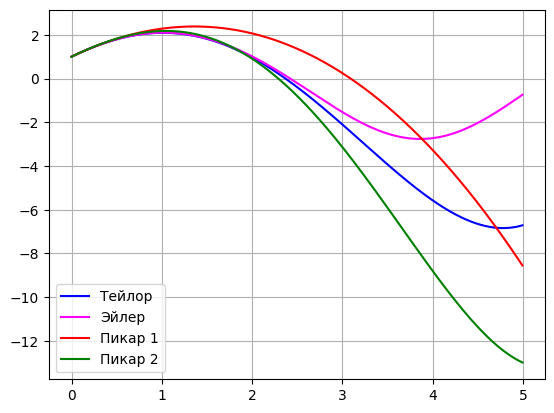

In [8]:
plt.grid(True)

plt.plot(x, y_row, color = "blue", label = "Тейлор")

plt.plot(x, y_eul(x, h), color = "magenta", label = "Эйлер")

plt.plot(x, y_pic_1(x), color = "red", label = "Пикар 1")
plt.plot(x, y_pic_2(x), color = "green", label = "Пикар 2")

plt.legend()

plt.show()

In [9]:
table = pt.PrettyTable()
table.add_column("x", np.round(x, 3))
table.add_column("Эйлер", np.round(y_row, 5))
table.add_column("Тейлор", np.round(y_eul(x, h), 5))
table.add_column("Пикар 1", np.round(y_pic_1(x), 5))
table.add_column("Пикар 2", np.round(y_pic_2(x), 5))

# print(table)

# Задача 2

In [10]:
# Приближения Пикара

def origin(y):
    return np.exp(y ** 2) - y ** 2 / 2 - 0.5

def x_1(y):
    return 0.5 + y ** 2 / 2 + y ** 4 / 4

def x_2(y):
    return 0.5 + y ** 2 / 2 + y ** 4 / 2 + y ** 6 / 12

def x_3(y):
    return 0.5 + y ** 2 / 2 + y ** 4 / 2 + y ** 6 / 6 + y ** 8 / 48

y_start, y_end = 0, 1
N = 100

h = (y_end - y_start) / N

y = np.arange(y_start, y_end, h)

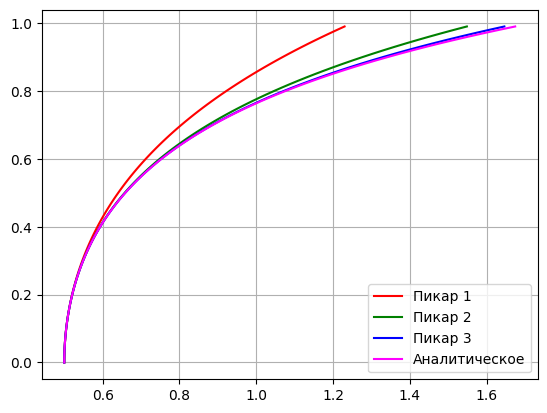

In [11]:
plt.grid(True)

plt.plot(x_1(y), y, color = "red", label = "Пикар 1")
plt.plot(x_2(y), y, color = "green", label = "Пикар 2")
plt.plot(x_3(y), y, color = "blue", label = "Пикар 3")

plt.plot(origin(y), y, color = "magenta", label = "Аналитическое")

plt.legend()

plt.show()

In [12]:
table = pt.PrettyTable()
table.add_column("x", np.round(y, 3))
table.add_column("Аналитическое", np.round(origin(y), 3))

table.add_column("Пикар 1", np.round(x_1(y), 5))
table.add_column("Пикар 2", np.round(x_2(y), 5))
table.add_column("Пикар 3", np.round(x_3(y), 5))

# print(table)

# Задание 3

In [13]:
# Эйлер
def y_eul(x, y, h):
    return y + h * (x ** 2 + y ** 2)

# Пикар
def y_pic_1(x):
    return (x ** 3) / 3

def y_pic_2(x):
    return y_pic_1(x) + (x ** 7) / 63

def y_pic_3(x):
    return y_pic_2(x) + 2 * (x ** 11) / (33 * 63) + (x ** 15) / (15 * 63 * 63)

def y_pic_4(x):
    return y_pic_3(x) + 13 * x ** 15 / 218295 + 82 * x ** 19 / 37328445 + 662 * x ** 23 / 10438212015 + 4 * x ** 27 / 3341878155 + x ** 31 / 109876902975

In [14]:
x_0 = 0   
x_max = 2

y_0 = 0

In [15]:
# Подбор шага
h = 1

while h >= 1e-6:
    
    y_cur = y_0
    x_cur = 0

    while x_cur <= 2:
        y_old = y_cur

        y_cur += h * (x_cur ** 2 + y_cur ** 2)
        x_cur += h
    
    print(f"x_max: {x_cur}, y: {y_cur}, h:{h}")
    h /= 10


x_max: 3, y: 6, h:1
x_max: 2.0000000000000004, y: 5.852099612170488, h:0.1
x_max: 2.0000000000000013, y: 28.392533752522635, h:0.01
x_max: 2.0009999999998906, y: 142.62724969805748, h:0.001
x_max: 2.0000999999997964, y: 277.3625001301253, h:0.0001
x_max: 2.000000000004635, y: 312.0612764029585, h:1e-05
x_max: 2.0000009999256516, y: 317.2459349534854, h:1.0000000000000002e-06


In [16]:
x = np.arange(x_0, x_max, h)
N = np.shape(x)[0]

y = np.zeros(N)

for i in range (1, N):
    y[i] = y_eul(x[i - 1], y[i - 1], h)

20000000


In [17]:
table = pt.PrettyTable()
table.add_column("x", np.round(x, 3))
table.add_column("Эйлер", np.round(y, 3))
table.add_column("Пикар 1", np.round(y_pic_1(x), 3))
table.add_column("Пикар 2", np.round(y_pic_2(x), 3))
table.add_column("Пикар 3", np.round(y_pic_3(x), 3))
table.add_column("Пикар 4", np.round(y_pic_4(x), 3))

# print(table)

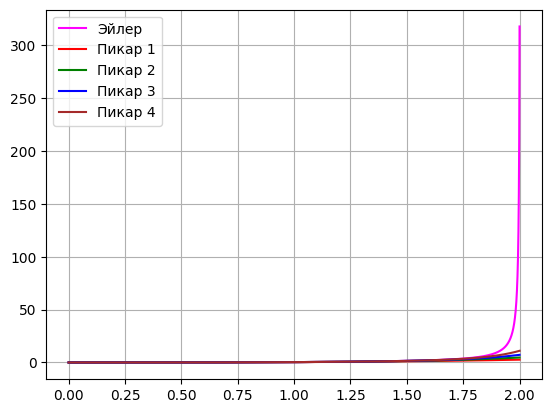

In [18]:
plt.grid(True)

plt.plot(x, y, color = "magenta", label = "Эйлер")

plt.plot(x, y_pic_1(x), color = "red", label = "Пикар 1")
plt.plot(x, y_pic_2(x), color = "green", label = "Пикар 2")
plt.plot(x, y_pic_3(x), color = "blue", label = "Пикар 3")
plt.plot(x, y_pic_4(x), color = "brown", label = "Пикар 4")

plt.legend()

plt.show()

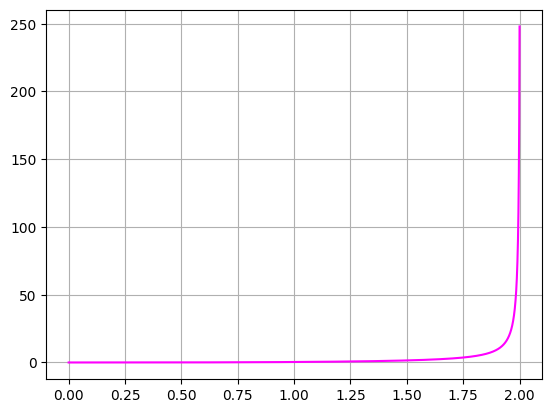

In [29]:
# Нахождение точки разрыва

x = np.array([0])
y = np.array([0])

h = 1e-4

y_0 = 0
y_cur = y_0

x_0 = 0
x_cur = x_0

while x_cur < 2:
    
    err = np.abs(y_cur - y_0)

    if (err > 1e-3):
        h /= 2
    elif (err < 1e-7):
        h *= 2
    
    y_0 = y_cur
    y_cur += h * (x_cur ** 2 + y_cur ** 2)
    x_cur += h

    x = np.append(x, x_cur)
    y = np.append(y, y_cur)

plt.grid()
plt.plot(x, y, color = "magenta", label = "Эйлер")
plt.show()